# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')
print(df)

         Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(baby_names.info)
print(baby_names.dtypes)

<bound method DataFrame.info of          Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]>
Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names[:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [5]:
baby_names =  baby_names.drop(['Unnamed: 0', 'Id'], axis=1)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:
female_counts = baby_names['Gender'].value_counts().get('F', 0)
men_counts = baby_names.shape[0] - female_counts

if female_counts - men_counts > 0:
    print("W zbiorze jest więcej kobiet")
else:
    print("W zbiorze jest więcej mężczyzn")

W zbiorze jest więcej kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
grouped_by_names = baby_names[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names.nlargest(10, 'Count'))

           Count
Name            
Jacob     242874
Emma      214852
Michael   214405
Ethan     209277
Isabella  204798
William   197894
Joshua    191551
Sophia    191446
Daniel    191440
Emily     190318


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [8]:
baby_names_female = baby_names.loc[baby_names['Gender']=='F']
grouped_by_names_female = baby_names_female[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names_female.nlargest(10, 'Count'))

            Count
Name             
Emma       214757
Isabella   204742
Sophia     191421
Emily      190211
Olivia     187962
Ava        167319
Madison    166681
Abigail    156168
Elizabeth  123608
Mia        123418


In [9]:
baby_names_male = baby_names.loc[baby_names['Gender']=='M']
grouped_by_names_male = baby_names_male[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names_male.nlargest(10, 'Count'))

            Count
Name             
Jacob      242706
Michael    214228
Ethan      209153
William    197796
Joshua     191444
Daniel     191303
Alexander  187037
Matthew    185188
Noah       179578
Anthony    179202


Index(['Jacob', 'Michael', 'Ethan', 'William', 'Joshua', 'Daniel', 'Alexander',
       'Matthew', 'Noah', 'Anthony'],
      dtype='object', name='Name')


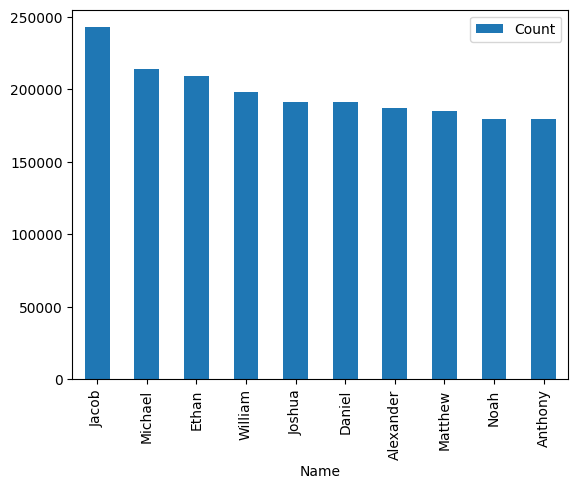

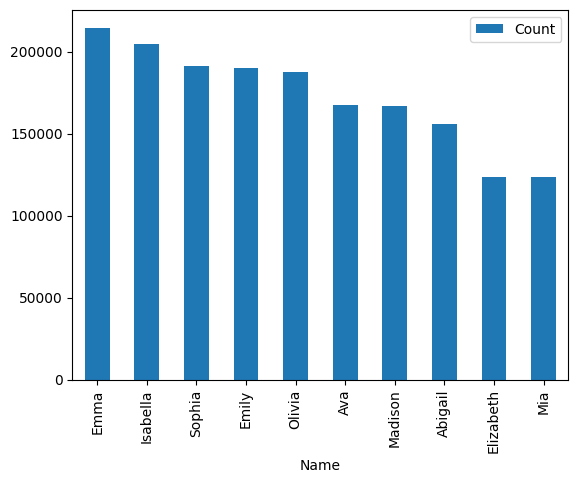

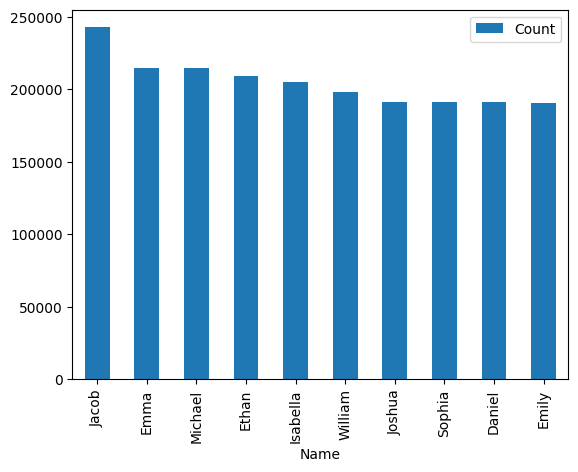

In [10]:
import matplotlib.pyplot as plt

grouped_by_names_male.nlargest(10, 'Count').plot(kind='bar')
print(grouped_by_names_male.nlargest(10, 'Count').index)
plt.show()

grouped_by_names_female.nlargest(10, 'Count').plot(kind='bar')
plt.show()

grouped_by_names.nlargest(10, 'Count').plot(kind='bar')
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [18]:
baby_names['Name'].unique()
# Jest 17632 różnych imion

array(['Emma', 'Madison', 'Hannah', ..., 'Braun', 'Evrett', 'Coalton'],
      dtype=object)

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [26]:
grouped_by_names['Probability'] = grouped_by_names['Count'] / grouped_by_names['Count'].sum()


In [50]:
names = grouped_by_names.iloc[:, []].index.tolist()

In [51]:
print(names)

['Aaban', 'Aadan', 'Aadarsh', 'Aaden', 'Aadhav', 'Aadhya', 'Aadi', 'Aadin', 'Aadit', 'Aaditya', 'Aadya', 'Aadyn', 'Aahan', 'Aahana', 'Aahil', 'Aahna', 'Aaiden', 'Aaima', 'Aakash', 'Aalaya', 'Aalayah', 'Aaleah', 'Aaleyah', 'Aalia', 'Aaliah', 'Aalijah', 'Aaliya', 'Aaliyah', 'Aaliyha', 'Aalyah', 'Aalyiah', 'Aamina', 'Aaminah', 'Aamir', 'Aamira', 'Aamiyah', 'Aanika', 'Aaniya', 'Aaniyah', 'Aanya', 'Aaradhya', 'Aaralyn', 'Aaralynn', 'Aarav', 'Aaren', 'Aaria', 'Aarian', 'Aariana', 'Aaric', 'Aarika', 'Aarin', 'Aarini', 'Aarion', 'Aariv', 'Aariyah', 'Aariz', 'Aarna', 'Aarnav', 'Aarohi', 'Aaron', 'Aaronjames', 'Aarron', 'Aarush', 'Aarushi', 'Aarvi', 'Aarya', 'Aaryan', 'Aaryav', 'Aaryn', 'Aasha', 'Aashi', 'Aashna', 'Aashritha', 'Aashvi', 'Aasia', 'Aasim', 'Aasiyah', 'Aastha', 'Aayan', 'Aayansh', 'Aayat', 'Aayden', 'Aayla', 'Aayush', 'Ab', 'Abagail', 'Abanoub', 'Abba', 'Abbagail', 'Abbas', 'Abbey', 'Abbi', 'Abbie', 'Abbiegail', 'Abbigail', 'Abbigale', 'Abbigayle', 'Abbott', 'Abby', 'Abbygail', 'Ab

In [59]:
import numpy as np
def random_name(n):
    p = grouped_by_names['Probability'].values
    for _ in range(n):
        yield np.random.choice(names, size=1, p=p)[0]

name_generator = random_name(20)

# Pobieranie 20 imion z generatora
for name in name_generator:
    print(name)

Dominic
Matthew
Katelyn
Emily
Aaliyah
Miguel
Andrea
Trinity
Elizabeth
Heaven
Muhammad
David
Tatiana
Layla
Sydney
Jocelyn
Nora
Noelani
Malik
Tyler


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [60]:
print(grouped_by_names.nlargest(1, 'Count'))

        Count  Probability
Name                      
Jacob  242874     0.006857


In [65]:
print(f"Średnia: {grouped_by_names['Count'].mean()}")
print(f"Mediana: {grouped_by_names['Count'].median()}")
print(f"Odchylenie standardowe: {grouped_by_names['Count'].std()}")

Średnia: 2008.932168784029
Mediana: 49.0
Mediana: 11006.06946789057


## Część II

Krok 1: Wczytaj dane

In [143]:
df = pd.read_csv('lab12_files/ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [144]:
df[:25]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [145]:
df[-10:]

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze? -- ODP: 943 rekordy, 5 kolumn

In [146]:
df.info

<bound method DataFrame.info of      user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

Krok 5: Wypisz nazwy kolumn

In [147]:
df.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [148]:
diff_occ = df['occupation'].value_counts()
diff_occ

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

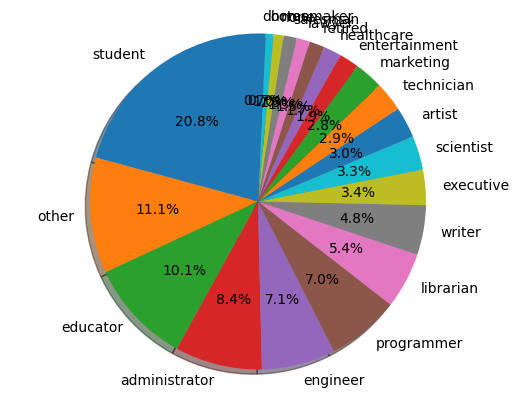

In [149]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(diff_occ.values, labels=diff_occ.index.to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

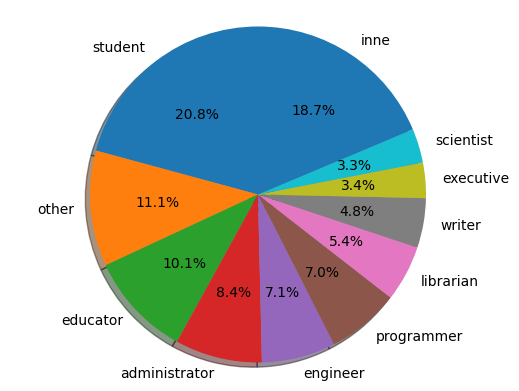

In [150]:
import numpy as np

fig2, ax2 = plt.subplots()
sizes = np.append(diff_occ[:10].values, [sum(diff_occ[10:].values)])
labels = np.array(diff_occ[:10].index.to_list() + ['inne'])
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

In [151]:
occupation_gender_counts = df.groupby(['occupation', 'gender']).size().reset_index(name='count')

top_occupations = (
    occupation_gender_counts.groupby('occupation')['count'].sum()
    .nlargest(10).index
)

top_occupation_data = occupation_gender_counts[
    occupation_gender_counts['occupation'].isin(top_occupations)
]

top_occ_women = top_occupation_data.loc[top_occupation_data['gender']=='F']
top_occ_men = top_occupation_data.loc[top_occupation_data['gender']=='M']

print(top_occ_women)
print(top_occ_men)

       occupation gender  count
0   administrator      F     36
5        educator      F     26
7        engineer      F      2
11      executive      F      3
19      librarian      F     29
25          other      F     36
27     programmer      F      6
33      scientist      F      3
35        student      F     60
39         writer      F     19
       occupation gender  count
1   administrator      M     43
6        educator      M     69
8        engineer      M     65
12      executive      M     29
20      librarian      M     22
26          other      M     69
28     programmer      M     60
34      scientist      M     28
36        student      M    136
40         writer      M     26


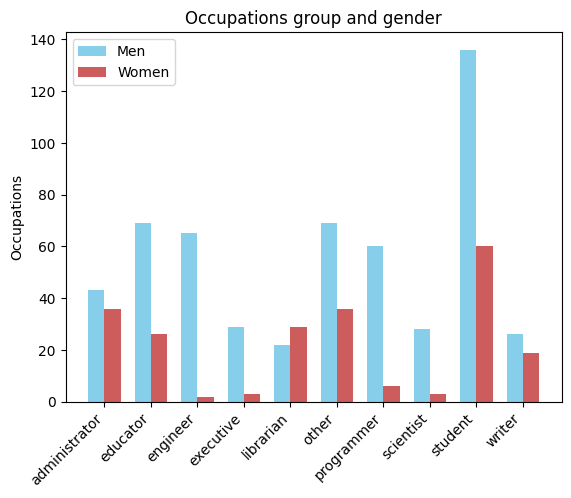

In [152]:
ind = np.arange(len(top_occ_men[:10]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, top_occ_men['count'], width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, top_occ_women['count'], width,
                color='IndianRed', label='Women')

ax.set_ylabel('Occupations')
ax.set_title('Occupations group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(top_occ_men['occupation'], rotation=45, ha='right')  # Set labels and rotate
ax.legend()

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

In [153]:
mean_age_occ = df[['occupation', 'age']].groupby('occupation').mean()
mean_age_occ.index.to_list()

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

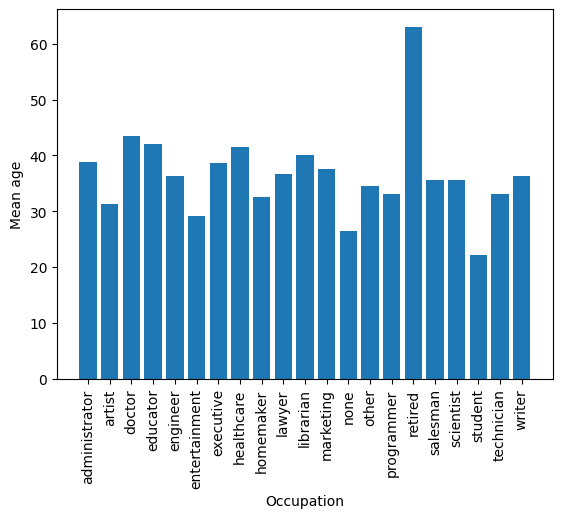

In [154]:
# mean_age_occ.plot(kind='bar', legend='mean age')
plt.bar(mean_age_occ.index.to_list(), mean_age_occ.values.flatten())
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Mean age")
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

In [155]:
occupation_gender_counts_age = df[['occupation', 'gender', 'age']].groupby(['occupation', 'gender']).mean().reset_index()

occ_age_women = occupation_gender_counts_age.loc[occupation_gender_counts_age['gender']=='F']
occ_age_men = occupation_gender_counts_age.loc[occupation_gender_counts_age['gender']=='M']

print(occ_age_women)
print(occ_age_men)

       occupation gender        age
0   administrator      F  40.638889
2          artist      F  30.307692
5        educator      F  39.115385
7        engineer      F  29.500000
9   entertainment      F  31.000000
11      executive      F  44.000000
13     healthcare      F  39.818182
15      homemaker      F  34.166667
17         lawyer      F  39.500000
19      librarian      F  40.000000
21      marketing      F  37.200000
23           none      F  36.500000
25          other      F  35.472222
27     programmer      F  32.166667
29        retired      F  70.000000
31       salesman      F  27.000000
33      scientist      F  28.333333
35        student      F  20.750000
37     technician      F  38.000000
39         writer      F  37.631579
       occupation gender        age
1   administrator      M  37.162791
3          artist      M  32.333333
4          doctor      M  43.571429
6        educator      M  43.101449
8        engineer      M  36.600000
10  entertainment      M  29

In [156]:
merged_data = pd.merge(
    occ_age_men, occ_age_women,
    on='occupation',
    how='outer',
    suffixes=('_men', '_women')
).fillna(0)

merged_data
# merged_data['age_men']

,occupation,gender_men,age_men,gender_women,age_women
0,administrator,M,37.162791,F,40.638889
1,artist,M,32.333333,F,30.307692
2,doctor,M,43.571429,0,0.000000
3,educator,M,43.101449,F,39.115385
4,engineer,M,36.600000,F,29.500000
5,entertainment,M,29.000000,F,31.000000
6,executive,M,38.172414,F,44.000000
7,healthcare,M,45.400000,F,39.818182
8,homemaker,M,23.000000,F,34.166667
9,lawyer,M,36.200000,F,39.500000


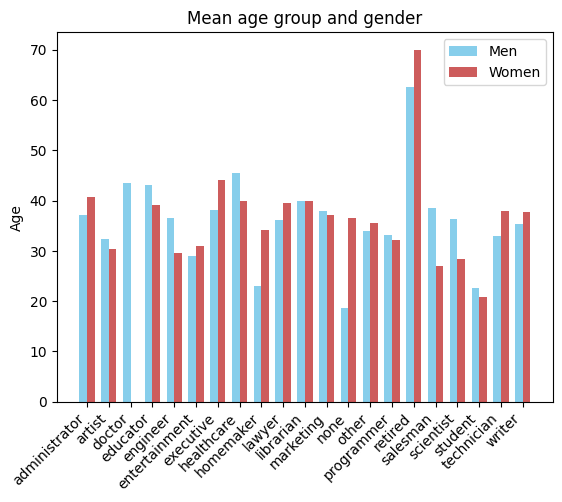

In [157]:
ind = np.arange(len(merged_data))
width = 0.35

fig3, ax3 = plt.subplots()
rects11 = ax3.bar(ind - width/2, merged_data['age_men'], width,
                color='SkyBlue', label='Men')
rects22 = ax3.bar(ind + width/2, merged_data['age_women'], width,
                color='IndianRed', label='Women')

ax3.set_ylabel('Age')
ax3.set_title('Mean age group and gender')
ax3.set_xticks(ind)
ax3.set_xticklabels(merged_data['occupation'], rotation=45, ha='right')  # Set labels and rotate
ax3.legend()

plt.show()